In [1]:
import h5py
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)

Using TensorFlow backend.


In [2]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn import metrics
from collections import OrderedDict
import dataexp as dtex # our code
import dataio as dtio # our code 
import preprocessing as pre # our code

from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC # SVM
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier

# machine learning models/techniques third parties 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.linear_model as sklm

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, silhouette_score

#from sklearn import metrics

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    for i in range(0,y1.astype('int32').max()+1):
        plt.scatter(X_t[np.where(abs(y1) == i), 0], X_t[np.where(abs(y1) == i), 1], marker='o', color=plt.cm.nipy_spectral(i / 10.), linewidth='1', alpha=0.8, label='{}_label'.format(i))
        
    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();

In [4]:
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [5]:
x_train_o = pd.read_csv('financial_data.csv')
y_train_o = pd.read_csv('revealed_businesses.csv')

x_test_o = pd.read_csv("testing_data.csv")

x_train_o.replace('?', np.nan, inplace=True)
x_train_o = x_train_o.astype('float64')


x_test_o.replace('?', np.nan, inplace=True)
x_test_o = x_test_o.astype('float64')

data_all = x_train_o.merge(y_train_o, on='Var1', how = 'left')

,total_instances,total_instances_with_missing_values,total_instances_without_missing_values,data_loss
0,9003.0,4702.0,4301.0,0.5223


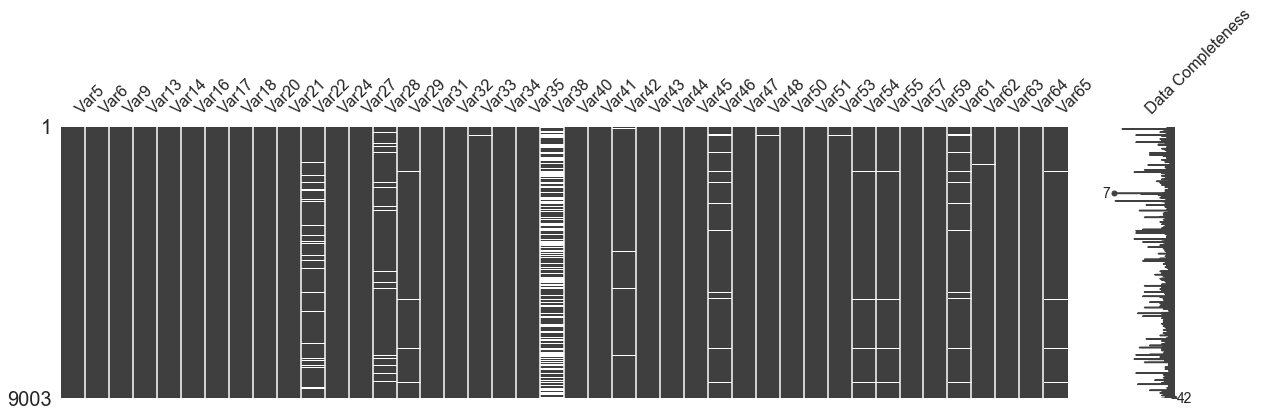

In [6]:
missing_stats_df = dtex.missing_stats(x_train_o)
display(missing_stats_df)
dtex.nullity_matrix([x_train_o], include_all = False)

In [7]:
data_nolabel = data_all[data_all.Var66.isnull()]
data_label = data_all[data_all.Var66.notnull()]

,total_instances,total_instances_with_missing_values,total_instances_without_missing_values,data_loss
0,4124.0,4124.0,0.0,1.0


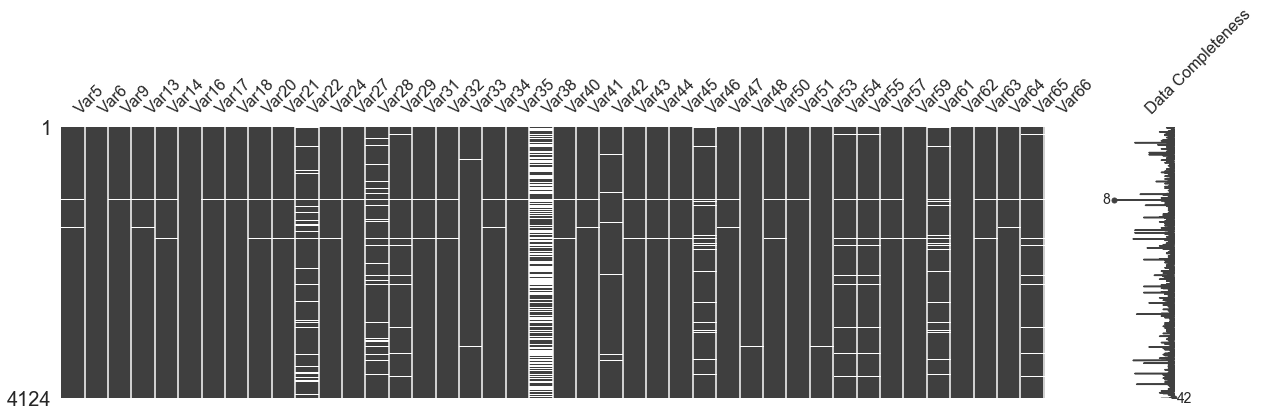

In [8]:
missing_stats_df_nolabel = dtex.missing_stats(data_nolabel)
display(missing_stats_df_nolabel)
dtex.nullity_matrix([data_nolabel], include_all = False)

,total_instances,total_instances_with_missing_values,total_instances_without_missing_values,data_loss
0,4879.0,2429.0,2450.0,0.4978


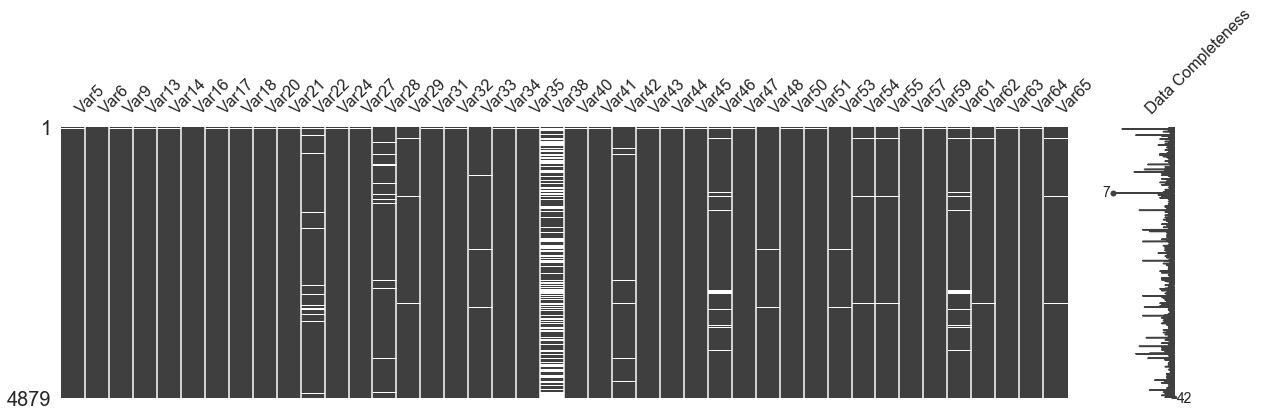

In [9]:
missing_stats_df_label = dtex.missing_stats(data_label)
display(missing_stats_df_label)
dtex.nullity_matrix([data_label], include_all = False)

In [10]:
data_nolabel_v = data_nolabel.drop(columns=['Var1', 'Var66'])
data_nolabel_id = data_nolabel['Var1']

data_label_v = data_label.drop(columns=['Var1', 'Var66'])
data_label_id = data_label['Var1']

data_nolabel_v_f = data_nolabel_v.fillna(data_nolabel_v.mean())
data_label_v_f = data_label_v.fillna(data_label_v.mean())

In [11]:
data_train_all_id = data_label['Var1']
data_train_all = data_label.drop(columns=['Var1'])

In [12]:
imp_mean_dfs = data_train_all.fillna(data_train_all.mean())
imp_mode_dfs = data_train_all.fillna(data_train_all.mode().iloc[0])

In [54]:
feature_important = ['Var28', 'Var22', 'Var25', 'Var7', 'Var27', 'Var17', 'Var35', 'Var30',
       'Var6', 'Var63', 'Var38', 'Var13', 'Var40', 'Var14', 'Var56', 'Var43',
       'Var65', 'Var3', 'Var31', 'Var26', 'Var11', 'Var36', 'Var33', 'Var59',
       'Var12', 'Var47', 'Var16', 'Var23', 'Var21', 'Var29', 'Var10', 'Var61',
       'Var34', 'Var60', 'Var48', 'Var39', 'Var18', 'Var57', 'Var51', 'Var37',
       'Var55', 'Var2', 'Var32', 'Var54', 'Var64', 'Var62', 'Var41', 'Var19',
       'Var45', 'Var20', 'Var58', 'Var5', 'Var15', 'Var42', 'Var24', 'Var52',
       'Var49', 'Var46', 'Var44', 'Var4', 'Var8', 'Var50', 'Var53', 'Var9']

In [57]:
X_cluster = data_nolabel_v_f[important_features_v].values
X_cluster = preprocessing.MinMaxScaler().fit_transform(X_cluster)

In [ ]:
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps=0.1, min_samples=5).fit(X_cluster)
labels = cluster.labels_
#confusion_matrix(imp_mean_dfs['Var66'].values, labels)
y_pred = pd.DataFrame(labels, columns=["Var66"])
#print(silhouette_score(X_cluster, labels))
# y_pred.loc[y_pred['Var66'] != 2, 'Var66'] = 0
# y_pred.loc[y_pred['Var66'] == 2, 'Var66'] = 1
y_pred['Var66'].value_counts()

In [ ]:
print(silhouette_score(X_cluster, labels))
y_pred.loc[y_pred['Var66'] == -1, 'Var66'] = 0
#y_pred.loc[y_pred['Var66'] == -1, 'Var66'] = 0
#confusion_matrix(data_label['Var66'].values, y_pred['Var66'].values)

In [ ]:
# from sklearn.cluster import KMeans

# cluster = KMeans(n_clusters=2, random_state=0).fit(X_cluster)
# labels = cluster.labels_
# #confusion_matrix(data_nolabel['Var66'].values, labels)
# y_pred = pd.DataFrame(labels, columns=["Var66"])
# print(silhouette_score(X_cluster, labels))
# # y_pred.loc[y_pred['Var66'] != 2, 'Var66'] = 0
# # y_pred.loc[y_pred['Var66'] == 2, 'Var66'] = 1
# y_pred['Var66'].value_counts()

In [ ]:
# from sklearn.cluster import AgglomerativeClustering

# cluster = AgglomerativeClustering(linkage='ward', n_clusters=2).fit(X_cluster)
# labels = cluster.labels_
# #confusion_matrix(imp_mean_dfs['Var66'].values, labels)
# y_pred = pd.DataFrame(labels, columns=["Var66"])
# print(silhouette_score(X_cluster, labels))
# # y_pred.loc[y_pred['Var66'] != 2, 'Var66'] = 0
# # y_pred.loc[y_pred['Var66'] == 2, 'Var66'] = 1
# y_pred['Var66'].value_counts()

In [ ]:
x_scale = preprocessing.MinMaxScaler().fit_transform(data_label_v_f.iloc[:,:].values)
x_scale_no = preprocessing.MinMaxScaler().fit_transform(data_nolabel_v_f.iloc[:,:].values)

In [ ]:
df_x_scale = pd.DataFrame(x_scale)
df_label_id = pd.DataFrame(data_label_id.reset_index(drop=True))
df_label_y = pd.DataFrame(data_label['Var66'].reset_index(drop=True))
data_label_all = pd.concat([df_label_id, df_x_scale, df_label_y], axis=1)
data_label_all.columns = data_all.columns

df_x_scale_no = pd.DataFrame(x_scale_no)
df_nolabel_id = pd.DataFrame(data_nolabel_id.reset_index(drop=True))
data_nolabel_pred = pd.concat([df_nolabel_id, df_x_scale_no, y_pred], axis=1)
data_nolabel_pred.columns = data_all.columns

In [ ]:
data_tran_all  = pd.concat([data_label_all, data_nolabel_pred], axis=0)

In [ ]:
os_dfs_dict = OrderedDict()

os_dfs_dict['mean'] = pre.oversample_smote(data_tran_all, columns = data_tran_all.columns, verbose=True)

In [ ]:
x_test_business_id = x_test_o['Var1']
x_test = x_test_o.drop(columns=['Var1'])
x_test_f = x_test.fillna(x_test.mean())
x_test_f = preprocessing.MinMaxScaler().fit_transform(x_test_f.values)


In [ ]:
best_period = os_dfs_dict['mean'][0]
X = best_period.iloc[:,1:-1].values
y = best_period["Var66"].values

# random_forest_classifier_sklearn_roc_all = RandomForestClassifier(criterion="gini", 
#                                                           n_estimators = 10,
#                                                           max_features = "sqrt", 
#                                                           random_state = 94)

# random_forest_classifier_sklearn_roc_all.fit(X, y)
# y_pred_dt = random_forest_classifier_sklearn_roc_all.predict(x_test_f)

bb_classifier_roc_all = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(criterion='gini'), 
                                          n_estimators = 15, bootstrap = True, random_state=42)

bb_classifier_roc_all.fit(X, y)
y_pred_dt = bb_classifier_roc_all.predict(x_test_f)


In [ ]:
df_y = pd.DataFrame(y_pred_dt, columns=["Is_Bankrupted"])
upload = pd.concat([x_test_business_id, df_y], axis=1)
df_y["Is_Bankrupted"].value_counts()

In [ ]:
upload = upload.astype('int32')
upload.columns=['Business_ID', 'Is_Bankrupted']
upload.to_csv('3_25_2.csv', index=False)

In [ ]:
f2=sns.pairplot(data_label_all, vars=data_all.columns[1:-1], hue='Outcome')

In [ ]:
f3=sb.clustermap(data_label_all.corr(), annot=True)